In [ ]:
from scipy.stats import pearsonr
from sklearn.decomposition import TruncatedSVD
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
a = []
b = []
c = []

In [ ]:
df0 = pd.read_csv('gdrive/My Drive/Colab Notebooks/citya_clu/cluster_0.csv')
df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/citya_clu/cluster_1.csv')
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/citya_clu/cluster_2.csv')

In [ ]:
svd = TruncatedSVD(n_components=1, algorithm='randomized', n_iter=100, random_state=7)
for i in (df0, df1, df2):
  svd.fit(i)
  a.append(svd.components_)
a

[array([[4.55988409e-05, 1.30288802e-04, 4.59678553e-04, 1.03441887e-04,
         2.08532657e-05, 2.25778773e-04, 5.03935744e-04, 7.26344523e-04,
         9.99999463e-01]]),
 array([[1.56309159e-04, 4.73285467e-04, 1.62605353e-03, 3.80195488e-04,
         8.18141327e-05, 1.37265995e-03, 2.23868989e-03, 2.65227229e-03,
         9.99991513e-01]]),
 array([[8.08258116e-05, 2.45554091e-04, 8.34841528e-04, 1.93313431e-04,
         4.12549037e-05, 5.59047318e-04, 1.05172879e-03, 1.35594450e-03,
         9.99997970e-01]])]

In [ ]:
df0 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityb_clu/cluster_0.csv')
df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityb_clu/cluster_1.csv')
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityb_clu/cluster_2.csv')

In [ ]:
for i in (df0, df1, df2):
  svd.fit(i)
  b.append(svd.components_)
b

[array([[8.02177008e-05, 2.65837214e-04, 8.57732567e-04, 2.00508128e-04,
         4.36394470e-05, 5.46181279e-04, 1.04316037e-03, 1.35341957e-03,
         9.99997963e-01]]),
 array([[1.50682824e-04, 5.02372632e-04, 1.61581559e-03, 3.86154898e-04,
         8.41868075e-05, 1.37607691e-03, 2.22667603e-03, 2.64289563e-03,
         9.99991561e-01]]),
 array([[4.64170090e-05, 1.44294775e-04, 4.76916411e-04, 1.09986375e-04,
         2.37331808e-05, 2.10377918e-04, 5.01324353e-04, 7.30743826e-04,
         9.99999454e-01]])]

In [ ]:
df0 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityc_clu/cluster_0.csv')
df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityc_clu/cluster_1.csv')
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityc_clu/cluster_2.csv')
df3 = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityc_clu/cluster_3.csv')

In [ ]:
for i in (df0, df1, df2, df3):
  svd.fit(i)
  c.append(svd.components_)
c

[array([[8.17915844e-05, 3.03001080e-04, 9.24835851e-04, 2.07544862e-04,
         4.84555040e-05, 5.74570853e-04, 1.09775158e-03, 1.39390912e-03,
         9.99997761e-01]]),
 array([[4.07146111e-05, 1.35478401e-04, 4.31392124e-04, 9.46624031e-05,
         2.17370022e-05, 2.01440222e-04, 4.51815197e-04, 6.50413168e-04,
         9.99999558e-01]]),
 array([[1.53564866e-04, 5.59432702e-04, 1.73062608e-03, 3.88546286e-04,
         8.80329485e-05, 1.41753458e-03, 2.25787743e-03, 2.65329195e-03,
         9.99991181e-01]]),
 array([[5.39823624e-05, 1.80672856e-04, 5.84616878e-04, 1.27704240e-04,
         2.93077020e-05, 2.08490728e-04, 5.53688067e-04, 8.48622922e-04,
         9.99999268e-01]])]

In [ ]:
def sentence_similarity(x, y):
    vector1 = np.squeeze(np.asarray(x))
    vector2 = np.squeeze(np.asarray(y))
    return pearsonr(vector1, vector2)[0]
 
def build_similarity_matrix(x,y):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(x), len(y)))
 
    for idx1 in range(len(x)):
        for idx2 in range(len(y)):
            similarity_matrix[idx1][idx2] = sentence_similarity(x[idx1], y[idx2])

    return similarity_matrix


In [ ]:
sm1 = build_similarity_matrix(b, c)
sm1

array([[1.        , 0.99999973, 0.99999895, 0.99999984],
       [0.99999906, 0.99999769, 0.99999999, 0.99999802],
       [0.99999975, 1.        , 0.99999778, 0.99999999]])

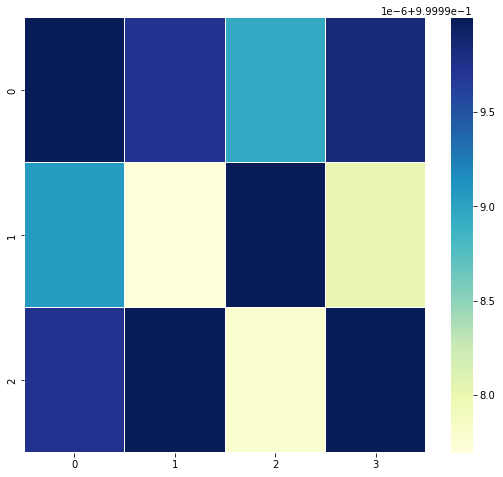

In [ ]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(sm1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)